In [ ]:
import os, sys

%load_ext autoreload
%autoreload 2

current = os.path.dirname(os.path.realpath("*.ipynb"))
parent = os.path.dirname(current)
sys.path.append(parent)
%cd ..

In [2]:
# !python mnist.py --num-epochs 10 

In [14]:
from mnist import *

In [19]:
device = torch.device(
    'cuda' if torch.cuda.is_available() else
    'mps' if torch.backends.mps.is_available() else
    'cpu'
)

# data loaders
train_dataset = datasets.MNIST(
    root='data', download=True, train=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(
    root='data', download=True, train=False, transform=transforms.ToTensor())

# training settings
lot_size = 600

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=lot_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=lot_size, shuffle=False)

model = LinearNet(in_features=784, hidden=100)

# loss function
criterion = nn.CrossEntropyLoss()

lr = 0.02
num_epochs = 20

# differentially private optimizer
optimizer = optim.DPSGD(model.named_parameters(), lot_size, lr=lr, noise_scale=1, max_grad_norm=4)

num_batches = len(train_loader)

logger = {'loss': [], 'total_loss': [], 'accuracy': [], 'total_accuracy': [], 'total_val_accuracy': []}

In [20]:
train_dp_model(model, criterion, optimizer, num_epochs, train_loader, test_loader, device=device,
               logger=logger)

Epoch 1/20, Step 1/100, Train Acc: 0.1217
Epoch 1/20, Step 2/100, Train Acc: 0.1317
Epoch 1/20, Step 3/100, Train Acc: 0.1183
Epoch 1/20, Step 4/100, Train Acc: 0.1067
Epoch 1/20, Step 5/100, Train Acc: 0.1300
Epoch 1/20, Step 6/100, Train Acc: 0.1200
Epoch 1/20, Step 7/100, Train Acc: 0.1100
Epoch 1/20, Step 8/100, Train Acc: 0.1283
Epoch 1/20, Step 9/100, Train Acc: 0.1167
Epoch 1/20, Step 10/100, Train Acc: 0.1233
Epoch 1/20, Step 11/100, Train Acc: 0.1167
Epoch 1/20, Step 12/100, Train Acc: 0.1200
Epoch 1/20, Step 13/100, Train Acc: 0.1183
Epoch 1/20, Step 14/100, Train Acc: 0.1117
Epoch 1/20, Step 15/100, Train Acc: 0.1017
Epoch 1/20, Step 16/100, Train Acc: 0.1233
Epoch 1/20, Step 17/100, Train Acc: 0.0950
Epoch 1/20, Step 18/100, Train Acc: 0.0917
Epoch 1/20, Step 19/100, Train Acc: 0.1167
Epoch 1/20, Step 20/100, Train Acc: 0.1283
Epoch 1/20, Step 21/100, Train Acc: 0.1100
Epoch 1/20, Step 22/100, Train Acc: 0.1117
Epoch 1/20, Step 23/100, Train Acc: 0.1183
Epoch 1/20, Step 24/

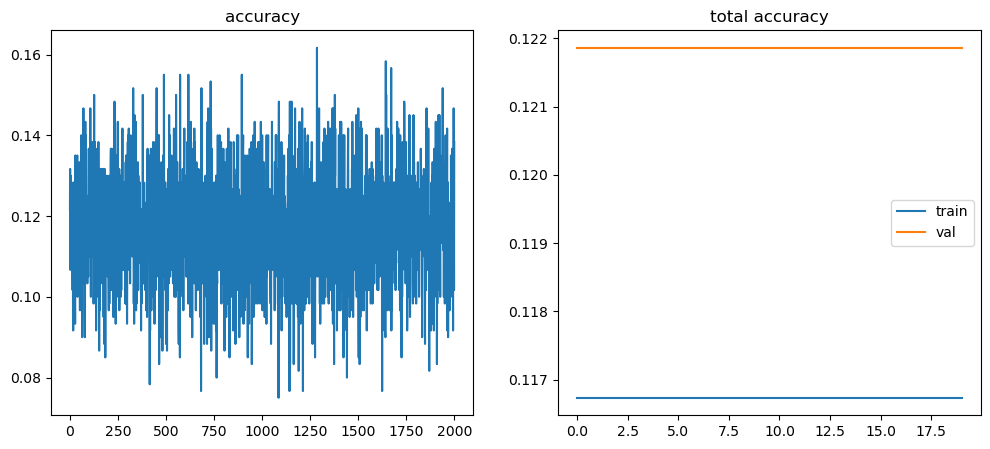

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(logger['accuracy'])
ax[0].set_title('accuracy')

ax[1].plot(logger['total_accuracy'], label='train')
ax[1].set_title('total accuracy')
ax[1].plot(logger['total_val_accuracy'], label='val')
ax[1].legend()
plt.show()